In the code segment below, we import the tools we are going to need and bring in our training data. After that on the tenth line of the code we remove any nan values in the data. Then in the next line we randomize the order of the data. The last line we print the shape of the array our data is stored in.

In [15]:
import numpy as np
import keras
import pandas
from keras_tqdm import TQDMNotebookCallback
from sklearn.preprocessing import StandardScaler

data = np.array(pandas.read_csv("./training_noavg.csv", header=0))
## Have to drop all the rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]
np.random.shuffle(data)

print(data.shape)

(1543, 9)


Next, we take and get a standardscaler. next we split the data from what location it is at and put it in x. after we split the data we use the scaler from earlier to transform the data. then we take the locations from earlier and put them in an array label then we use keras.utils.to_categorical to turn it into one hot encoding.

In [16]:
from sympy import *
init_printing(use_latex=True)

import matplotlib.pyplot as plt
%matplotlib inline

## we will use scaled data
scaler = StandardScaler()
## when testing predicitions
## X = scaler.fit_transform( X )
## test = scaler.transform( test )

X = data[:,0:8]
X = scaler.fit_transform(X)
print(X.shape)
display(X)

labels = data[:,8]
print(labels.shape)
display(labels)

Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

(1543, 8)


array([[-2.94439193, -0.76184435, -0.29408942, ...,  0.74520521,
         1.18529535,  0.0363514 ],
       [ 0.57228641,  0.20786143,  1.2706691 , ..., -1.64675956,
        -0.79404526,  1.11500938],
       [ 0.92395424, -1.73155012,  1.04713217, ..., -0.27992255,
         1.51518545,  0.252083  ],
       ...,
       [-0.48271709,  0.93514076, -1.41177407, ...,  0.74520521,
         0.19562504, -1.68950137],
       [ 0.57228641,  0.20786143,  1.04713217, ..., -1.64675956,
        -1.12393536,  1.33074098],
       [-0.13104926,  1.1775672 , -1.18823714, ...,  0.74520521,
         0.19562504, -1.47376977]])

(1543,)


array([2., 1., 2., ..., 0., 1., 0.])

In [17]:
input_size = X.shape[1]
output_size = Y.shape[1]
display(X.shape[1])

The code below is the declaration of the network. we are using a multilayer net the hidden layers are declared on the third and fourth lines below. They are both given 64 hidden units and fed the input dimensions which is the number of columns in this case 8. In the first hidden layer we used the relu activation function and the second is using sigmoid. we are using these activation functions because they proved to work the best for our data set. and we have set the bis initializers to 0.01. For the output layer which is on line 6 of the code below we used the activation function SoftMax. And then we compile the model using the categorical crossentropy loss function and adam and the optimizer. the output below the code segment is the summary of the model.

In [18]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(64,input_dim=8,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(64,input_dim=8,activation='sigmoid', bias_initializer=keras.initializers.Constant(value=0.01)))

model.add(keras.layers.Dense(3,activation='softmax'))
#categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
_________________________________________________________________
None


Now we train the model with our training data. for our data set 100 epochs was enough, but a different data set may need more or less, epochs is the number of times the modal runs through the data set. we are using a validation split to check the accuracy of the modal on data it is not training on. a validation split takes part of the training data and keeps it to test with instead of training with it.

In [19]:
history = model.fit(X, Y,
    batch_size=56, 
    epochs=100, 
    verbose=0,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.2)

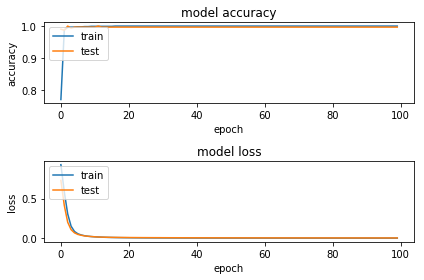

1543/1543 [==============================] - 0s 45us/step
Test loss: 0.000774434064955925
Test accuracy: 0.9993519118600129


In [20]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Above are graphs that show how the model did in its training as you can see the accuracy is basically 100%. and the loss is low that is what we are looking for. and right below we are saving the model and its weights to be used in the demo.

In [21]:
model.save_weights('./Demo/MLN.weights')
model.save('./Demo/MLN.model')